In [12]:
from tbparse import SummaryReader
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()

In [2]:
scallar_tags = ['Evaluation Train/ AR@1',
 'Evaluation Train/ AR@10',
 'Evaluation Train/ AR@100',
 'Evaluation Train/ AR@100 (large)',
 'Evaluation Train/ AR@100 (medium)',
 'Evaluation Train/ AR@100 (small)',
 'Evaluation Train/ mAP',
 'Evaluation Train/ mAP (large)',
 'Evaluation Train/ mAP (medium)',
 'Evaluation Train/ mAP (small)',
 'Evaluation Train/ mAP@.50IOU',
 'Evaluation Train/ mAP@.75IOU',
 'Evaluation Validation/ AR@1',
 'Evaluation Validation/ AR@10',
 'Evaluation Validation/ AR@100',
 'Evaluation Validation/ AR@100 (large)',
 'Evaluation Validation/ AR@100 (medium)',
 'Evaluation Validation/ AR@100 (small)',
 'Evaluation Validation/ mAP',
 'Evaluation Validation/ mAP (large)',
 'Evaluation Validation/ mAP (medium)',
 'Evaluation Validation/ mAP (small)',
 'Evaluation Validation/ mAP@.50IOU',
 'Evaluation Validation/ mAP@.75IOU',
 'Loss/ Classification',
 'Loss/ Localization',
 'Loss/ Total',
 'Lr']

In [33]:

def split_tensorboard_graphs (df, tag):
    df_tag = df[df["tag"] == tag].reset_index()
    first_indx = (df_tag.iloc[0])["index"]
    df_1 = pd.DataFrame([], columns=["step", "tag", "value"])
    df_2 = pd.DataFrame([], columns=["step", "tag", "value"])
    for step in range(0, df_tag.shape[0], 2):
        df_1 = pd.concat([df_1, df_tag[df_tag["index"] == first_indx+step]], axis=0)
        df_2 = pd.concat([df_2, df_tag[df_tag["index"] == first_indx+step+1]], axis=0)
    df_1 = df_1.drop("index", axis=1)
    df_2 = df_2.drop("index", axis=1)
    return df_1, df_2

In [34]:
dir_temp_path = "loss_m_local1_m_class1/iter3000_lr2e-05_momentum0.9"
lr_prefix = "lrNameCosineDecay_"

log_dir = "/home/manos/develop/fs_detector/loggings/experiments/SGD"
colors = ["k", "b", "g", "tab:red", "c", "m", "y", "tab:orange", "tab:olive", "tab:pink", "tab:brown"]


# ts_graphs = ["baseline", "two", "s_two", "three", "s_three", "s_three_", "four", "s_four", "early_four", "tower"]

# graph_names = ["Last Layer (Predictors)", "Two Layers",  "Two Layers (Symmetric)", "Three Layers", "Three Layer (Symmetric)", "Three Layer (Symmetric)*", "Four Layers", "Four Layers (Symmetric)", "Four Layers (Early)", "Full Tower"]

ts_graphs = ["baseline", "two", "s_two", "three", "s_three", "four", "s_four"]

graph_names = ["Baseline (Last Layer)", "Baseline (L2)",  "Proposed (L2)", "Baseline (L3)",  "Proposed (L3)", "Baseline (L4)",  "Proposed (L4)"]


In [35]:
class_name = "bird"
ts_log_file_path = f"{log_dir}/{class_name}/{dir_temp_path}/{lr_prefix}"

In [41]:
loc = 'lower right'
split_is_needed = True
map_upper_value = 1
map_lower_value = 0.43
step_upper_value = 3000
step_lower_value = 200


for ts_graph, graph_name, color in zip(ts_graphs, graph_names, colors):
    reader = SummaryReader(f"{ts_log_file_path}{ts_graph}")
    df = reader.tensors
    evaluation_df = df[df["tag"] == 'Evaluation Validation/ mAP']
    if split_is_needed and (ts_graph == "s_four" or ts_graph == "s_three_"):
        _, evaluation_df = split_tensorboard_graphs(df, 'Evaluation Validation/ mAP')
    evaluation_df = evaluation_df[evaluation_df["value"] <= map_upper_value]
    evaluation_df = evaluation_df[evaluation_df["value"] >= map_lower_value]
    evaluation_df = evaluation_df[evaluation_df["step"] <= step_upper_value]
    evaluation_df = evaluation_df[evaluation_df["step"] >= step_lower_value].reset_index(drop=True)
    plt.plot("step", "value", data=evaluation_df, label=graph_name, color=color)
plt.xlabel("Iterations")
plt.ylabel("mAP")
plt.legend(loc=loc)
mpld3.display()

In [38]:
reader = SummaryReader(f"{ts_log_file_path}{ts_graph}")
df = reader.tensors
# df_eval = df[df["tag"] == 'Evaluation Validation/ mAP'].reset_index()


df_tag = df[df["tag"] == 'Evaluation Validation/ mAP'].reset_index()
first_indx = (df_tag.iloc[0])["index"]
df_1 = pd.DataFrame([], columns=["step", "tag", "value"])
df_2 = pd.DataFrame([], columns=["step", "tag", "value"])
for step in range(0, df_tag.shape[0], 2):
    df_1 = pd.concat([df_1, df_tag[df_tag["index"] == first_indx+step]], axis=0)
    df_2 = pd.concat([df_2, df_tag[df_tag["index"] == first_indx+step+1]], axis=0)
df_1 = df_1.drop("index", axis=1)
df_2 = df_2.drop("index", axis=1)

df_2

,step,tag,value
1,19,Evaluation Validation/ mAP,0.000000
3,39,Evaluation Validation/ mAP,0.000000
5,59,Evaluation Validation/ mAP,0.005941
7,79,Evaluation Validation/ mAP,0.103078
9,99,Evaluation Validation/ mAP,0.288411
...,...,...,...
291,2919,Evaluation Validation/ mAP,0.482932
293,2939,Evaluation Validation/ mAP,0.482930
295,2959,Evaluation Validation/ mAP,0.482864
297,2979,Evaluation Validation/ mAP,0.482867


In [39]:
df_1

,step,tag,value
0,19,Evaluation Validation/ mAP,0.000000
2,39,Evaluation Validation/ mAP,0.000000
4,59,Evaluation Validation/ mAP,0.000000
6,79,Evaluation Validation/ mAP,0.031683
8,99,Evaluation Validation/ mAP,0.200460
...,...,...,...
290,2919,Evaluation Validation/ mAP,0.639013
292,2939,Evaluation Validation/ mAP,0.639013
294,2959,Evaluation Validation/ mAP,0.639009
296,2979,Evaluation Validation/ mAP,0.639013


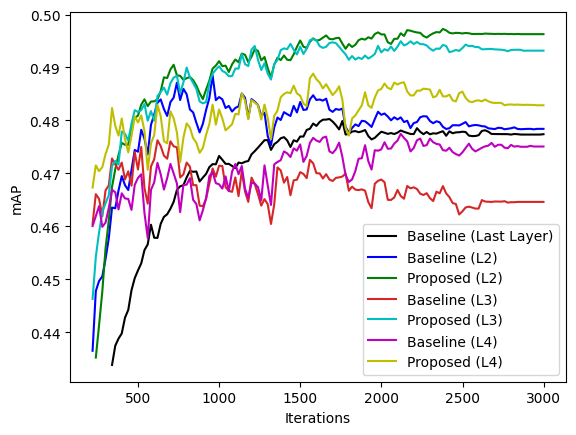

In [48]:
class_names = ["coffee_cup", "fish", "flower", "helmet", "tire", "bird"]
limits = [[1, 0.65, 3000, 200], [1, 0, 3000, 190], [1, 0.15, 3000, 200], [1, 0, 3000, 400], [1, 0, 3000, 0], [1, 0.43, 3000, 200]]

# for class_name, limit in zip(class_names, limits):
# class_name = "coffee_cup"
idx = 5
class_name = class_names[idx]
ts_log_file_path = f"{log_dir}/{class_name}/{dir_temp_path}/{lr_prefix}"
loc = 'lower right'
split_is_needed = True

# map_upper_value = 1
# map_lower_value = 0
# step_upper_value = 3000
# step_lower_value = 0
limit = limits[idx]
map_upper_value = limit[0]
map_lower_value = limit[1]
step_upper_value = limit[2]
step_lower_value = limit[3]


for ts_graph, graph_name, color in zip(ts_graphs, graph_names, colors):
    reader = SummaryReader(f"{ts_log_file_path}{ts_graph}")
    df = reader.tensors
    evaluation_df = df[df["tag"] == 'Evaluation Validation/ mAP']
    if split_is_needed and (ts_graph == "s_four" or ts_graph == "s_three_"):
        _, evaluation_df = split_tensorboard_graphs(df, 'Evaluation Validation/ mAP')
    evaluation_df = evaluation_df[evaluation_df["value"] <= map_upper_value]
    evaluation_df = evaluation_df[evaluation_df["value"] >= map_lower_value]
    evaluation_df = evaluation_df[evaluation_df["step"] <= step_upper_value]
    evaluation_df = evaluation_df[evaluation_df["step"] >= step_lower_value].reset_index(drop=True)
    plt.plot("step", "value", data=evaluation_df, label=graph_name, color=color)
plt.xlabel("Iterations")
plt.ylabel("mAP")
plt.legend(loc=loc)
plt.savefig(f'./saved_figs/with_full/{class_name}.png')